In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,6)
sns.set_style("whitegrid")


In [119]:
df = pd.read_csv("chotot_oto_database.csv")  # đổi tên file theo file của bạn
df.head()


,URL,Chính sách bảo hành,Dòng xe,Giá,Hãng xe,Hộp số,Kiểu dáng,Nhiên liệu,Năm sản xuất,Số chỗ,...,Tình trạng,URL hình ảnh,Xuất xứ,Địa chỉ,Còn hạn đăng kiểm,Có phụ kiện đi kèm,Số Km đã đi,Trọng lượng,Trọng tải,Số đời chủ
0,https://xe.chotot.com/mua-ban-oto-quan-binh-ta...,Bảo hành hãng,VF5,495.000.000 đ,VinFast,Tự động,Hatchback,Điện,2025,5,...,Mới,https://cdn.chotot.com/c8T48_fpcFSH6baNHAf5WMn...,Việt Nam,"Phường An Lạc, Quận Bình Tân, Tp Hồ Chí Minh",NaN,NaN,NaN,NaN,NaN,NaN
1,https://xe.chotot.com/mua-ban-oto-quan-10-tp-h...,Bảo hành hãng,E Class,1.199.000.000 đ,Mercedes Benz,Tự động,Sedan,Xăng,2019,5,...,Đã sử dụng,https://cdn.chotot.com/48lLeFy54yTuEIkTRTyb4yo...,Việt Nam,"Phường 2, Quận 10, Tp Hồ Chí Minh",Có,Có,41000.0,> 1 tấn,> 2 tấn,NaN
2,https://xe.chotot.com/mua-ban-oto-quan-binh-ta...,Bảo hành hãng,VF3,281.000.000 đ,VinFast,Tự động,Hatchback,Điện,2025,4,...,Mới,https://cdn.chotot.com/uac2/720041,Việt Nam,"Phường An Lạc A, Quận Bình Tân, Tp Hồ Chí Minh",NaN,NaN,NaN,NaN,NaN,NaN
3,https://xe.chotot.com/mua-ban-quan-7-tp-ho-chi...,Bảo hành hãng,Ghibli,1.398.000.000 đ,Maserati,Tự động,Sedan,Xăng,2016,5,...,Đã sử dụng,https://cdn.chotot.com/_OFvwS7WBedpTPPqVxTDXeG...,Nước khác,"Phường Bình Thuận, Quận 7, Tp Hồ Chí Minh",Có,Có,56000.0,> 1 tấn,> 2 tấn,NaN
4,https://xe.chotot.com/mua-ban-quan-tan-binh-tp...,Bảo hành hãng,VF6,646.000.000 đ,VinFast,Tự động,SUV / Cross over,Điện,2025,5,...,Mới,https://cdn.chotot.com/6Jab2xEUrAlA27MsNLlYTmu...,Việt Nam,"Phường 5, Quận Tân Bình, Tp Hồ Chí Minh",NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  2923 non-null   object 
 1   Chính sách bảo hành  2922 non-null   object 
 2   Dòng xe              2922 non-null   object 
 3   Giá                  2922 non-null   object 
 4   Hãng xe              2922 non-null   object 
 5   Hộp số               2922 non-null   object 
 6   Kiểu dáng            2322 non-null   object 
 7   Nhiên liệu           2922 non-null   object 
 8   Năm sản xuất         2922 non-null   object 
 9   Số chỗ               2599 non-null   object 
 10  Thời gian đăng       0 non-null      float64
 11  Tên người đăng       2922 non-null   object 
 12  Tên sản phẩm         2922 non-null   object 
 13  Tình trạng           2922 non-null   object 
 14  URL hình ảnh         2922 non-null   object 
 15  Xuất xứ              2922 non-null   o

In [121]:
df.describe()


,Thời gian đăng,Số Km đã đi
count,0.0,2508.000000
mean,NaN,69450.750000
std,NaN,63960.345738
min,NaN,0.000000
25%,NaN,31950.000000
50%,NaN,61000.000000
75%,NaN,90000.000000
max,NaN,999999.000000


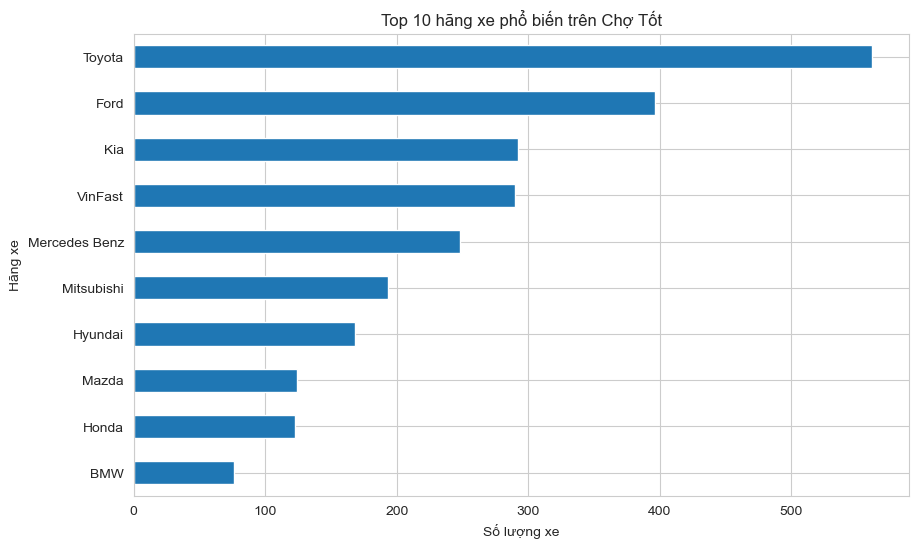

In [122]:
plt.figure()
top_brands.sort_values().plot(kind='barh')
plt.title("Top 10 hãng xe phổ biến trên Chợ Tốt")
plt.xlabel("Số lượng xe")
plt.ylabel("Hãng xe")
plt.show()


In [128]:
def chuyen_gia_vnd(x):
    if pd.isna(x):
        return np.nan
    
    x = str(x).lower().replace(',', '').strip()
    import numpy as np
import re

def chuyen_gia_vnd(x):
    if pd.isna(x):
        return np.nan

    x = str(x).lower().strip()

    # Loại bỏ ký hiệu tiền
    x = x.replace('đ', '').replace('vnđ', '').replace('vnd', '')

    # Trường hợp: "1.2 tỷ", "2 tỷ"
    if 'tỷ' in x:
        so = re.findall(r'\d+\.?\d*', x)
        if so:
            return float(so[0]) * 1_000_000_000

    # Trường hợp: "850 triệu"
    if 'triệu' in x:
        so = re.findall(r'\d+\.?\d*', x)
        if so:
            return float(so[0]) * 1_000_000

    # Trường hợp: "495.000.000", "495,000,000"
    x = x.replace('.', '').replace(',', '')

    # Cuối cùng: số thuần
    try:
        return float(x)
    except:
        return np.nan

    if 'tỷ' in x:
        return float(re.findall(r'\d+\.?\d*', x)[0]) * 1_000_000_000
    elif 'triệu' in x:
        return float(re.findall(r'\d+\.?\d*', x)[0]) * 1_000_000
    else:
        return float(x)

df['Giá'] = df['Giá'].apply(chuyen_gia_vnd)


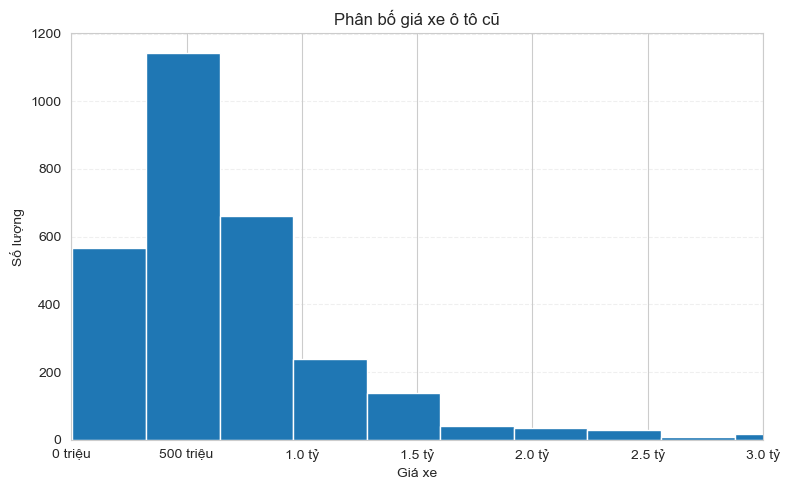

In [129]:
plt.figure(figsize=(8,5))
plt.hist(df['Giá'].dropna(), bins=30)

plt.title("Phân bố giá xe ô tô cũ")
plt.xlabel("Giá xe")
plt.ylabel("Số lượng")

plt.xlim(0, 3_000_000_000)

def format_vnd(x, pos):
    if x >= 1_000_000_000:
        return f"{x/1_000_000_000:.1f} tỷ"
    else:
        return f"{int(x/1_000_000)} triệu"

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_vnd))
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


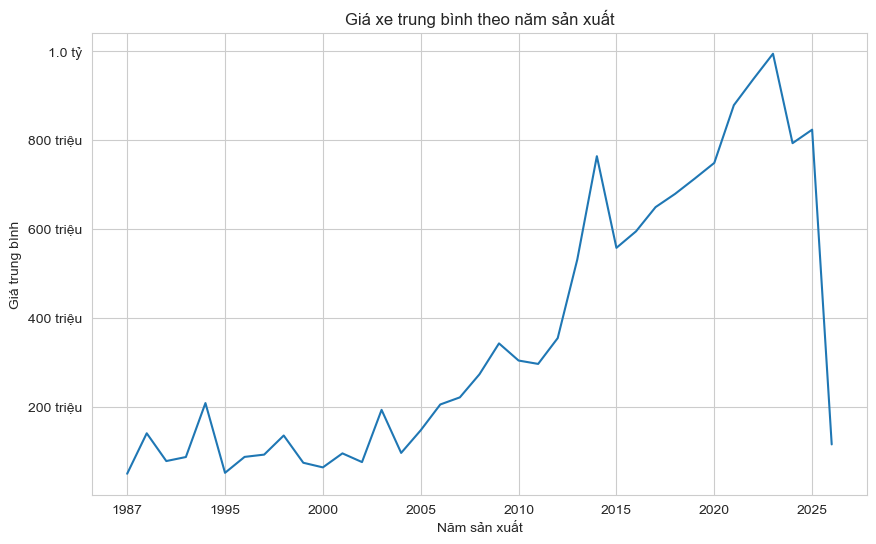

In [67]:
df.groupby('Năm sản xuất')['Giá'].mean().plot()

plt.title("Giá xe trung bình theo năm sản xuất")
plt.xlabel("Năm sản xuất")
plt.ylabel("Giá trung bình")

def format_vnd(y, pos):
    if y >= 1_000_000_000:
        return f"{y/1_000_000_000:.1f} tỷ"
    else:
        return f"{int(y/1_000_000)} triệu"

plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(format_vnd)
)

plt.show()


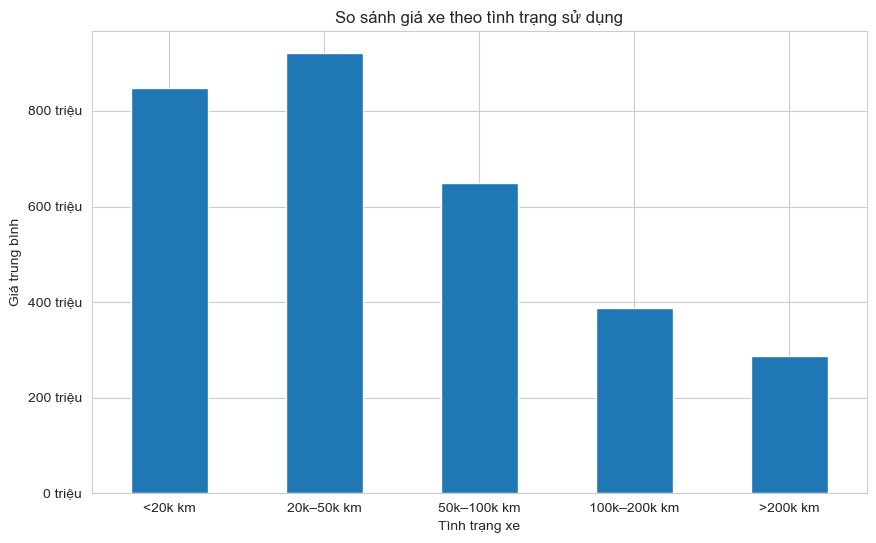

In [117]:
plt.figure()
ax = gia_tb.plot(kind='bar')

plt.title("So sánh giá xe theo tình trạng sử dụng")
plt.xlabel("Tình trạng xe")
plt.ylabel("Giá trung bình")

def format_vnd(y, pos):
    if y >= 1_000_000_000:
        return f"{y/1_000_000_000:.1f} tỷ"
    else:
        return f"{int(y/1_000_000)} triệu"

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_vnd))

plt.xticks(rotation=0)
plt.show()


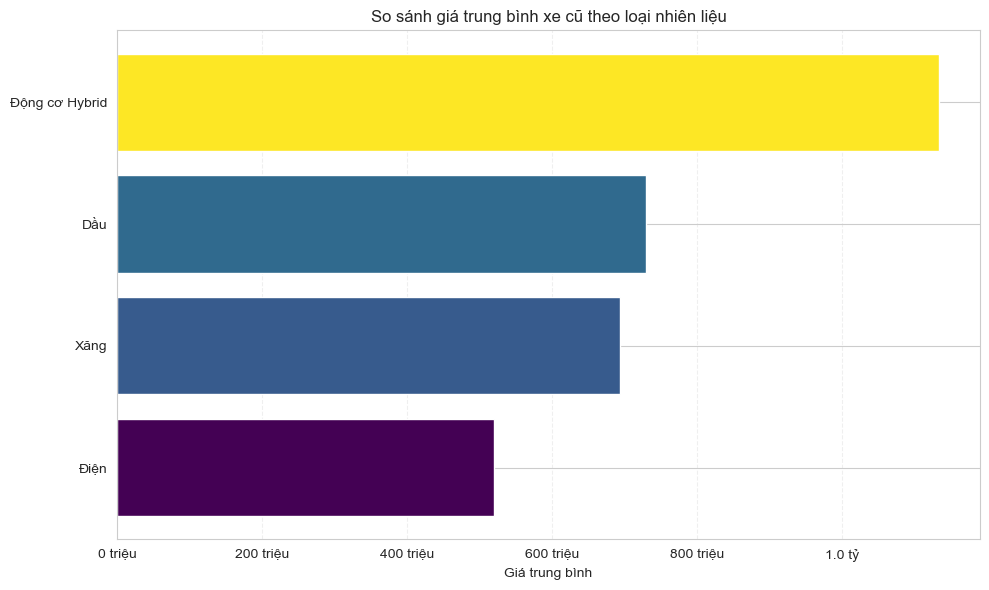

In [112]:
# Tạo màu chuyển sắc theo giá
colors = plt.cm.viridis(
    (values - values.min()) / (values.max() - values.min())
)

bars = plt.barh(labels, values, color=colors)

plt.xlabel("Giá trung bình")
plt.title("So sánh giá trung bình xe cũ theo loại nhiên liệu")

# 🔹 Format trục X: TRIỆU / TỶ VNĐ
def format_vnd(x, pos):
    if x >= 1_000_000_000:
        return f"{x/1_000_000_000:.1f} tỷ"
    else:
        return f"{int(x/1_000_000)} triệu"

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_vnd))

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
